In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
print(os.listdir('/kaggle/input'))

/kaggle/input/prawapicollected/praw_dataset.csv
['prawapicollected']


# Comparison of PS4 and Xbox One Communities in Reddit

PS4 and XBOXone are modern gaming gadgets of the same generation. Comparisons of these two competitors are often made among those interested in the technology and gaming industry. Both companies have been in a competition for a long time, releasing each new product in the near future. My aim is to shed light on the factors of this competition and to compare these two communities with each other through various analyzes.

As an active user of Reddit, I believe that it is a mature and effective social media platform that consists of user opinions on thousands of different subjects. Also, the comments and reviews in Reddit are mostly considered proffesional or at least knowledgeable, and the users of this community are fairly young and technology oriented. Thats why, I think it is a great platform to test 2 competitors and pioneers in terms of technologic products, ps4 and xboxone in terms of users' sentimental approach, community behaviors and their most frequently mentioned terms.

# Data Acquisition

In [2]:
!pip install praw
import praw
from praw.models import MoreComments
import json
import csv
import html
from datetime import datetime

     |████████████████████████████████| 159 kB 865 kB/s 


In [3]:
client_id="####"
client_secret="####"
password="####"
user_agent="####"
username="####"

In [4]:
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret,
                     password=password, user_agent=user_agent,
                     username=username)

To be able to pull data from reddit API, I use my account and create a developer account in this platform. I hide my account informations in this file to prevent possible privacy issues.

In [5]:
def get_comments(text):
    for submission in reddit.subreddit(text).top(limit=50):
        if not submission.stickied and submission.is_self:
            comments = submission.comments
            
            for comment in comments:
                if isinstance(comment, MoreComments):
                    continue
                elif len(str(comment.body).split()) > 3 and (comment.score !=1):
                    try:
                        thewriter.writerow([str(comment.id),
                                            str(comment.body),
                                            int(comment.score),
                                            float(comment.created_utc),
                                            str(datetime.fromtimestamp(submission.created_utc)),
                                            str(comment.submission),
                                            str(comment.subreddit),
                                           ])
                    except:
                        TypeError

In [6]:
#with open("praw_dataset.csv","w", newline = "") as f:
#    thewriter = csv.writer(f)
#    
#    thewriter.writerow(["comment_id","comment_body","comment_score","unix_time","date","submission","subreddit"])
#    get_comments("PS4")
#    get_comments("xboxone")

This is my custom API request function, I write the data to a csv. file.

For this project, I collected data from top 50 submissions of PS4 and xboxone subreddits in Reddit. I filtered stickied submissions, which are submissions that pinned to the top of the subreddit by administrators. And also, I filtered out submissions that are not self posts, which also indicates that the submission is not containing links outside of reddit such as youtube videos, and contains textual posts of users.

Because of the tree structure of Reddit comments, I also filtered out "MoreComments" option. That object represents loading more comments. This situation enabled me to filter the comments that got negative scores, that is, they did not reflect the opinion of the community. I also filtered out the comments with 1 score since it is default comment score in Reddit. This way, I guaranteed that all comments in my dataset are seen by others. 

Finally, I removed the comments with less than 3 sentences, because these comments mostly gave the names of the games. This may cause a lot of 0 sentiment points in sentiment analysis and may affect it negatively.

You can find the function I wrote for data extraction in the appendix.

# Import, Clean and Inspect Data

In [7]:
import pandas as pd
import html
import matplotlib as plt

In [8]:
df = pd.read_csv("/kaggle/input/prawapicollected/praw_dataset.csv", encoding = "ISO-8859-1")

In [9]:
df.head()

,comment_id,comment_body,comment_score,unix_time,date,submission,subreddit
0,dg6fmxv,that would be a nice feature,3264,1.492026e+09,2017-04-12 22:45:44,650hpd,PS4
1,dg6l25d,No mans sky would have been fucked off in abou...,2006,1.492032e+09,2017-04-13 00:21:40,650hpd,PS4
2,dg6fv4x,I don't know if Shawn Layden is really the one...,457,1.492027e+09,2017-04-12 22:49:37,650hpd,PS4
3,dg6m8x2,It's one of my favorite things about Steam and...,147,1.492034e+09,2017-04-13 00:45:11,650hpd,PS4
4,dg7cvar,Another big difference is the fact that Xbox a...,31,1.492077e+09,2017-04-13 12:42:57,650hpd,PS4


In [10]:
df.describe(include='all')

,comment_id,comment_body,comment_score,unix_time,date,submission,subreddit
count,1050,1050,1050.000000,1.050000e+03,1050,1050,1050
unique,1050,1050,NaN,NaN,1045,10,2
top,f1e5etl,I fully support this,NaN,NaN,2020-09-21 16:20:40,d8t3km,PS4
freq,1,1,NaN,NaN,2,215,566
mean,NaN,NaN,179.218095,1.544302e+09,NaN,NaN,NaN
std,NaN,NaN,887.551529,3.215396e+07,NaN,NaN,NaN
min,NaN,NaN,2.000000,1.492026e+09,NaN,NaN,NaN
25%,NaN,NaN,2.000000,1.528836e+09,NaN,NaN,NaN
50%,NaN,NaN,5.000000,1.544480e+09,NaN,NaN,NaN
75%,NaN,NaN,21.000000,1.569367e+09,NaN,NaN,NaN


This collected praw dataset contains 7 attributes. Comment_id describes unique id of each comment, comment body is textual content of the instance. Comment score is summation of number of likes and dislikes of the comments. Initial score is 1, therefore, to prevent bias and use the comments which people interacted, I dropped comments with 1 score.

Unix_time is default time attribute of comments in unix format, and date is its derived form into more human readable format. Submission attribute indicates the post which comment belongs. And subreddit is the 2 subreddits that data is collected, xboxone and ps4.

- comment_id : 1050 distinct nominal categories. ID of each comment.
- comment_body: 1050 distinct nominal categories. Textual content of each comment.
- comment_score: Discrete quantiative values of comment scores. Values between 2 and 12824. with median of 5.
- unix_time: Discrete quantiative values of time of comment posts. Values between 1.492026e+09 and 1.600731e+09. 
- date: Human readable time format of submission dates.
- submission: Nominal categorical data with 10 unique values. This means top 4 submissions from Xbox subreddit, and top 6     submissions from PS4 subreddit.
- subreddit: Binary Nominal data. 2 subreddits, XboxOne and PS4.

In [11]:
df.shape

(1050, 7)

The dataset in its pure form contains 7 instances and 1050 rows. 566 of the rows come from the ps4 subreddit and 485 from the xboxone subreddit.

In order to avoid any problem in the analysis, I convert the tab or newline spaces in the commentbody to space, I convert these texts to lowercase letters. In this way, while calculating the frequency of the words, those with case difference will appear as the same word.

In [12]:
def simplify_text(text):
    return html.unescape(" ".join(text.split()))

def lower_sentences(text):
    return text.lower()

In [13]:
df["comment_body"] = df["comment_body"].map(lower_sentences)
df["comment_body"] = df["comment_body"].map(simplify_text)

In [14]:
!pip install langdetect
from langdetect import detect
import re

def detect_comment_lang(comment):
    
    comment = ' '.join(re.sub("(@[A-Za-z0-9_\-]+ )|(https?:\/\/.* )|(www\..* )"," ",comment).split())
    try:
        lang = detect(comment)
    except:
        lang = ""
        
    return lang

df["lang"] = df["comment_body"].map(detect_comment_lang)

# Summarizes detected language counts:
df["lang"].value_counts()

     |████████████████████████████████| 981 kB 860 kB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993190 sha256=321920184b7f08e437e8ffd20db9cbc29eafe86447b228a7151374b67ac8d0ee
  Stored in directory: /root/.cache/pip/wheels/59/f6/9d/85068904dba861c0b9af74e286265a08da438748ee5ae56067
Successfully built langdetect


en    1026
af       7
it       3
da       2
fr       2
cy       2
tl       2
hr       1
et       1
sk       1
nl       1
ca       1
sv       1
Name: lang, dtype: int64

In [15]:
df = df[df["lang"] == "en"]

In [16]:
df["lang"].value_counts()

en    1026
Name: lang, dtype: int64

In [17]:
df = df.drop(["lang"],axis = 1)

In [18]:
df.shape

(1026, 7)

In [19]:
df.tail()

,comment_id,comment_body,comment_score,unix_time,date,submission,subreddit
1044,f1e6xkw,way ahead of you. stopped buying after blops-i...,2,1.569415e+09,2019-09-25 15:29:50,d8t3km,xboxone
1045,f1e81u9,gamers rise up i cant believe this oppression,2,1.569416e+09,2019-09-25 15:45:13,d8t3km,xboxone
1046,f1e8f01,you get what you pay for supporting activision...,2,1.569416e+09,2019-09-25 15:50:06,d8t3km,xboxone
1048,f1ee5eq,jesus this is the dweebiest headline ive ever...,2,1.569420e+09,2019-09-25 17:02:07,d8t3km,xboxone
1049,f1eeb1a,it should be at least 50 dollars for xbox owners.,2,1.569420e+09,2019-09-25 17:03:54,d8t3km,xboxone


In addition, I identify the comments in different languages and remove them from the dataset to prevent the analyzes from giving incorrect results. At the end of this, we have an 8 column dataset with 1022 instance. I dropped LANG column after I finished this process.

At the end of this, dataset is ready for preprocessing step.

# Data Preprocessing

In [20]:
!pip install autocorrect
from nltk.corpus import stopwords
import sys
import re
import nltk.data
from nltk import pos_tag_sents
from nltk.sentiment.util import mark_negation
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.tokenize import TweetTokenizer
from autocorrect import Speller
from emoji import get_emoji_regexp

     |████████████████████████████████| 621 kB 862 kB/s 
  Created wheel for autocorrect: filename=autocorrect-2.3.0-py3-none-any.whl size=621586 sha256=05c5f39a0dba267683cbfd3a12f07e19e62462f5909c0b8ba14c51da6696e526
  Stored in directory: /root/.cache/pip/wheels/61/57/90/81773ba730e74f94d7e494543807695eacbf42528c9d2ad488
Successfully built autocorrect


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Tokenization and Postagging

In [21]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['comment_body']), axis=1)

In [22]:
df['tokenized_postagged'] = df.apply(lambda row: nltk.pos_tag(row['tokenized_sents']), axis=1)

In [23]:
df.tail()

,comment_id,comment_body,comment_score,unix_time,date,submission,subreddit,tokenized_sents,tokenized_postagged
1044,f1e6xkw,way ahead of you. stopped buying after blops-i...,2,1.569415e+09,2019-09-25 15:29:50,d8t3km,xboxone,"[way, ahead, of, you, ., stopped, buying, afte...","[(way, NN), (ahead, RB), (of, IN), (you, PRP),..."
1045,f1e81u9,gamers rise up i cant believe this oppression,2,1.569416e+09,2019-09-25 15:45:13,d8t3km,xboxone,"[gamers, rise, up, i, cant, believe, this, opp...","[(gamers, NNS), (rise, VBP), (up, RP), (i, JJ)..."
1046,f1e8f01,you get what you pay for supporting activision...,2,1.569416e+09,2019-09-25 15:50:06,d8t3km,xboxone,"[you, get, what, you, pay, for, supporting, ac...","[(you, PRP), (get, VBP), (what, WP), (you, PRP..."
1048,f1ee5eq,jesus this is the dweebiest headline ive ever...,2,1.569420e+09,2019-09-25 17:02:07,d8t3km,xboxone,"[jesus, this, is, the, dweebiest, headline, i...","[(jesus, NN), (this, DT), (is, VBZ), (the, DT)..."
1049,f1eeb1a,it should be at least 50 dollars for xbox owners.,2,1.569420e+09,2019-09-25 17:03:54,d8t3km,xboxone,"[it, should, be, at, least, 50, dollars, for, ...","[(it, PRP), (should, MD), (be, VB), (at, IN), ..."


I applied tokenization and postagging techniques to comment_body to normalize text data. After these processes, I move data for lemmatization process.

### Lemmatization

In [24]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

lemmatizer = WordNetLemmatizer()

def get_lemmatizer_pos(pos):
    pos_start = pos[0] # Takes the first letter to simplify the POS tag
    if pos_start == "J":
        return wn.ADJ
    elif pos_start == "V":
        return wn.VERB
    elif pos_start == "R":
        return wn.ADV
    else:
        return wn.NOUN 
    
    
def lemmatize_text(text):

        return [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in text]


In [25]:
df['lemmatized'] = df["tokenized_postagged"].apply(lemmatize_text)

In [26]:
df.tail()

,comment_id,comment_body,comment_score,unix_time,date,submission,subreddit,tokenized_sents,tokenized_postagged,lemmatized
1044,f1e6xkw,way ahead of you. stopped buying after blops-i...,2,1.569415e+09,2019-09-25 15:29:50,d8t3km,xboxone,"[way, ahead, of, you, ., stopped, buying, afte...","[(way, NN), (ahead, RB), (of, IN), (you, PRP),...","[way, ahead, of, you, ., stop, buy, after, blo..."
1045,f1e81u9,gamers rise up i cant believe this oppression,2,1.569416e+09,2019-09-25 15:45:13,d8t3km,xboxone,"[gamers, rise, up, i, cant, believe, this, opp...","[(gamers, NNS), (rise, VBP), (up, RP), (i, JJ)...","[gamers, rise, up, i, cant, believe, this, opp..."
1046,f1e8f01,you get what you pay for supporting activision...,2,1.569416e+09,2019-09-25 15:50:06,d8t3km,xboxone,"[you, get, what, you, pay, for, supporting, ac...","[(you, PRP), (get, VBP), (what, WP), (you, PRP...","[you, get, what, you, pay, for, support, activ..."
1048,f1ee5eq,jesus this is the dweebiest headline ive ever...,2,1.569420e+09,2019-09-25 17:02:07,d8t3km,xboxone,"[jesus, this, is, the, dweebiest, headline, i...","[(jesus, NN), (this, DT), (is, VBZ), (the, DT)...","[jesus, this, be, the, dweebiest, headline, i..."
1049,f1eeb1a,it should be at least 50 dollars for xbox owners.,2,1.569420e+09,2019-09-25 17:03:54,d8t3km,xboxone,"[it, should, be, at, least, 50, dollars, for, ...","[(it, PRP), (should, MD), (be, VB), (at, IN), ...","[it, should, be, at, least, 50, dollar, for, x..."


### Removing Stop Words and Punctuations

In [27]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
  
stop_words = set(stopwords.words('english')) 
stop_words.update(["the", '...' , '--' , "''" , '``' , "'s"])
punct = "!\"“”#$%&'‘’()*+,-./:;<=>?@[\]^_`{|}~‍"


I also updated stop words after some analysis, some punctuations are occurred quite often, and it may be because of the lingo of the community.

In [28]:
for item in df["lemmatized"]:
    for word in item:
        if word in stop_words:
            item.remove(word)

In [29]:
for item in df["lemmatized"]:
    for word in item:        
        if word in punct:
            item.remove(word)

These 2 for loops does not work sometimes, I don't know the reason of it but when I use them twice, they remove stop words and punctuations, and work properly.

In [30]:
print(stop_words)

{'be', 'mustn', 'with', 'to', "should've", 've', 'above', 'where', 'here', 'from', 'more', 'haven', 'when', 'themselves', 'isn', 'does', "it's", 'while', 'than', 'same', 'should', 'himself', 'through', 'having', 'its', 'whom', "you'll", 'any', 'both', "isn't", "you'd", "shouldn't", 'yours', 'me', 'doing', 'until', 'an', 'shan', 'only', 'you', 'am', 'before', 'no', 'ma', 'being', 's', 'd', '``', "'s", 'a', 'at', 'how', 'who', "weren't", "she's", 'shouldn', 'against', 'been', 'which', 'did', 'once', '--', 'off', 'hers', "wouldn't", 'out', "didn't", 'nor', 'so', 'will', 'some', 'below', 'aren', 'he', "needn't", 'up', 'is', 'i', 'didn', 'myself', 'your', 'their', 'because', 'too', 'after', 'this', 'are', 'him', 'during', "you're", 'her', 're', 'few', "aren't", 'by', 'can', 'was', 'why', "you've", 'now', "don't", 'were', 'there', 'we', 'had', 'down', 'our', 'the', "mightn't", 'then', "hadn't", 'other', "hasn't", 'under', 'just', 'has', 'itself', 'ourselves', 'm', "doesn't", 'that', 'y', 'do

In [31]:
df.tail(5)

,comment_id,comment_body,comment_score,unix_time,date,submission,subreddit,tokenized_sents,tokenized_postagged,lemmatized
1044,f1e6xkw,way ahead of you. stopped buying after blops-i...,2,1.569415e+09,2019-09-25 15:29:50,d8t3km,xboxone,"[way, ahead, of, you, ., stopped, buying, afte...","[(way, NN), (ahead, RB), (of, IN), (you, PRP),...","[way, ahead, you, stop, buy, blops-it, the, ga..."
1045,f1e81u9,gamers rise up i cant believe this oppression,2,1.569416e+09,2019-09-25 15:45:13,d8t3km,xboxone,"[gamers, rise, up, i, cant, believe, this, opp...","[(gamers, NNS), (rise, VBP), (up, RP), (i, JJ)...","[gamers, rise, i, cant, believe, oppression]"
1046,f1e8f01,you get what you pay for supporting activision...,2,1.569416e+09,2019-09-25 15:50:06,d8t3km,xboxone,"[you, get, what, you, pay, for, supporting, ac...","[(you, PRP), (get, VBP), (what, WP), (you, PRP...","[get, you, pay, support, activision, happen, d..."
1048,f1ee5eq,jesus this is the dweebiest headline ive ever...,2,1.569420e+09,2019-09-25 17:02:07,d8t3km,xboxone,"[jesus, this, is, the, dweebiest, headline, i...","[(jesus, NN), (this, DT), (is, VBZ), (the, DT)...","[jesus, be, dweebiest, headline, ive, ever, see]"
1049,f1eeb1a,it should be at least 50 dollars for xbox owners.,2,1.569420e+09,2019-09-25 17:03:54,d8t3km,xboxone,"[it, should, be, at, least, 50, dollars, for, ...","[(it, PRP), (should, MD), (be, VB), (at, IN), ...","[should, at, least, 50, dollar, xbox, owner]"


# Word Frequencies

Now, I split these 2 communities to analyze their usage of words and the sentiment scores of their comments.

In [32]:
dfps = df.loc[df['subreddit'] =="PS4"]
dfxbox = df.loc[df['subreddit'] =="xboxone"]

In [33]:
from nltk.probability import FreqDist
fdist_ps = FreqDist()

In [34]:
fdist_xbox = FreqDist()

for word in dfxbox["lemmatized"]:    
    for i in word:
        fdist_xbox[i.lower()]+= 1
print("20 most used words in XBOX community:  \n {}".format(fdist_xbox.most_common(20)))        


20 most used words in XBOX community:  
 [('be', 238), ('the', 218), ('game', 168), ('a', 147), ('get', 107), ('this', 106), ('i', 102), ("n't", 91), ('buy', 91), ('xbox', 84), ('play', 74), ('year', 69), ('it', 67), ('like', 65), ('go', 59), ('have', 57), ('make', 56), ('fuck', 53), ('people', 52), ('to', 51)]


In [35]:
fdist_xbox.N() # total number of samples

9950

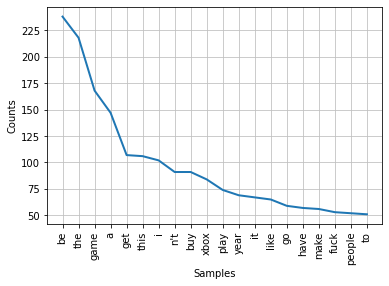

In [36]:
fdist_xbox.plot(20)

In [37]:
print("Percentage of usage of like word in xbox group is: {}".format(fdist_xbox.most_common(15)[7][1] / fdist_xbox.N())) 

Percentage of usage of like word in xbox group is: 0.00914572864321608


In [38]:
print("Percentage of usage of fuck word in xbox group is: {}".format(fdist_xbox.most_common(15)[10][1] / fdist_xbox.N())) 

Percentage of usage of fuck word in xbox group is: 0.007437185929648241


In [39]:
print("Percentage of usage of shit word in xbox group is: {}".format(fdist_xbox.most_common(15)[13][1] / fdist_xbox.N())) 

Percentage of usage of shit word in xbox group is: 0.006532663316582915


In [40]:
for word in dfps["lemmatized"]:    
    for i in word:
        fdist_ps[i.lower()]+= 1
print("20 most used words in PS4 community:")  
fdist_ps.most_common(20) 

20 most used words in PS4 community:


[('the', 340),
 ('be', 278),
 ('game', 258),
 ('a', 204),
 ('sony', 193),
 ('i', 191),
 ('play', 169),
 ("n't", 152),
 ('ps4', 151),
 ('get', 142),
 ('this', 111),
 ('my', 108),
 ('it', 108),
 ('account', 104),
 ('do', 101),
 ('have', 98),
 ('you', 95),
 ('like', 90),
 ('player', 89),
 ('make', 82)]

In [41]:
fdist_ps.N() # total number of samples

13738

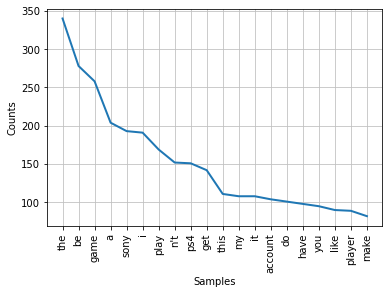

In [42]:
fdist_ps.plot(20)

In [43]:
print("Percentage of usage of like word in PS4 group is: {}".format(fdist_xbox.most_common(15)[8][1] / fdist_xbox.N())) 

Percentage of usage of like word in PS4 group is: 0.00914572864321608


The selection of words by community in comments are seems slightly more polite in PS4 community.

### WordClouds 

Wordclouds is another popular method to visualize popular words used in documents.

In [44]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [45]:
txt = dfps['lemmatized'].astype(str)
text = " ".join(review for review in txt)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 119729 words in the combination of all review.


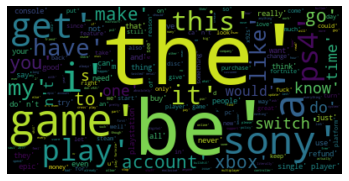

Wordcloud of PS Community


In [46]:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print("Wordcloud of PS Community")

In [47]:
txt2 = dfxbox['lemmatized'].astype(str)
text2 = " ".join(review for review in txt2)
print ("There are {} words in the combination of all review.".format(len(text2)))

There are 87799 words in the combination of all review.


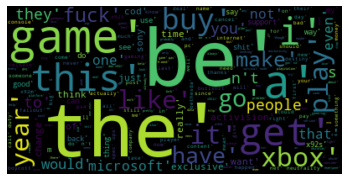

Wordcloud of XBOX community


In [48]:
wordcloud = WordCloud().generate(text2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print("Wordcloud of XBOX community")

After these analyzing steps, now I can form and test my hypotheses.

# Hypothesis 1

In [49]:
!pip install scikit_posthocs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statistics
from scipy import stats
import math
import scikit_posthocs as sp
%matplotlib inline

     |████████████████████████████████| 43 kB 154 kB/s 
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
    Preparing wheel metadata ... - done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37886 sha256=7f09e8bb144ed69a3c989bc75ec27aed2718980d5f4900731cb8db417f6f6146
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


My first hypothesis is to test if mean of comment likes of each community are same.

H0: There is no difference between the average comment scores of ps4 and xboxone communities. (µ1 = µ2)

Ha: There is a difference between the average comment scores of ps4 and xboxone communities. (µ1 != µ2)

Significance level of tests are 0.05. To define the appropriate hypothesis testing, we need to understand these groups. They are not same samples on different conditions,they are independent, therefore we need an unpaired test.


In [50]:
dfps["comment_score"].mean()

188.77297297297298

In [51]:
dfxbox["comment_score"].mean()

158.92144373673037

### Statistical Tests

Assumptions:

- normality
- equal variances
- independency

First we test the normality of the data.

H0: Data is normally distributed

Ha: Data is not normally distributed.


In [52]:
print("P-value of Shapiro-Wilk test for ps community is: {}".format(stats.shapiro(dfps["comment_score"])[1]))
print("P-value of Shapiro-Wilk test for xbox community is: {}".format(stats.shapiro(dfxbox["comment_score"])[1]))

P-value of Shapiro-Wilk test for ps community is: 1.233142648605839e-43
P-value of Shapiro-Wilk test for xbox community is: 2.4712879327293176e-40


Shapiro-Wilk test indicates that these 2 data are not normally distributed.

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


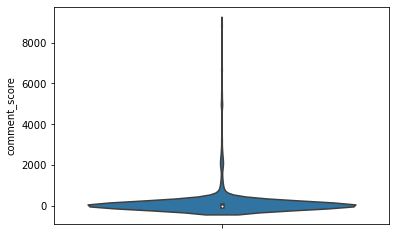

In [53]:
f = sns.violinplot(y=dfxbox["comment_score"], orient='h')

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


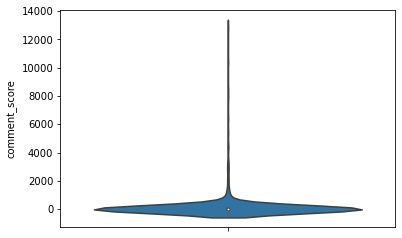

In [54]:
f = sns.violinplot(y=dfps["comment_score"], orient='h')

Then we apply levene test, to determine whether two or more groups have equal variances. I applied median as center since data is heavily skewed.

In [55]:
stats.levene(dfps["comment_score"] ,dfxbox["comment_score"], center='median')

LeveneResult(statistic=0.2863043975726186, pvalue=0.5927147224118108)

The p-value is not less than .05, thus, we would fail to reject the null hypothesis. We do not have sufficient evidence to say that the variance in these communities comment scores are significantly different.

Since we have 2 not normally distibuted, unpaired data with equal variances, we can apply Mann Whitney U test for hypothesis testing.


In [56]:
stats.mannwhitneyu(x=dfps["comment_score"], y=dfxbox["comment_score"])

MannwhitneyuResult(statistic=125025.0, pvalue=0.11164217625259443)

Result of Mann-Whitney U test indicates that, pvalue is higher than the significance level 0.05. Therefore, we don't have a strong evidence against null hypothesis. It means that there is not a significant difference between the average comment scores of these 2 communities.

This can be interpreted as the interaction in comment section of both communities are similar.

# Sentiment Analysis

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

In [58]:
def analyze_sentiment(data, sentiment_analyzer=SentimentIntensityAnalyzer()):

    sentences = data
    
    sentiments = [sentiment_analyzer.polarity_scores(sentence)["compound"] for sentence in sentences 
                  if sentiment_analyzer.polarity_scores(sentence)["compound"] != 0]
    
    # Returns the average compound sentiment score if a sentiment is detected.
    if sentiments:
        return sum(sentiments)/len(sentiments)
    # Returns 0 if a sentiment is not detected:
    else:
        return 0

In [59]:
dfps["sentiment"] = dfps["lemmatized"].map(analyze_sentiment)
dfxbox["sentiment"] = dfxbox["lemmatized"].map(analyze_sentiment)

dfxbox.tail(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,comment_id,comment_body,comment_score,unix_time,date,submission,subreddit,tokenized_sents,tokenized_postagged,lemmatized,sentiment
1044,f1e6xkw,way ahead of you. stopped buying after blops-i...,2,1.569415e+09,2019-09-25 15:29:50,d8t3km,xboxone,"[way, ahead, of, you, ., stopped, buying, afte...","[(way, NN), (ahead, RB), (of, IN), (you, PRP),...","[way, ahead, you, stop, buy, blops-it, the, ga...",-0.296000
1045,f1e81u9,gamers rise up i cant believe this oppression,2,1.569416e+09,2019-09-25 15:45:13,d8t3km,xboxone,"[gamers, rise, up, i, cant, believe, this, opp...","[(gamers, NNS), (rise, VBP), (up, RP), (i, JJ)...","[gamers, rise, i, cant, believe, oppression]",0.000000
1046,f1e8f01,you get what you pay for supporting activision...,2,1.569416e+09,2019-09-25 15:50:06,d8t3km,xboxone,"[you, get, what, you, pay, for, supporting, ac...","[(you, PRP), (get, VBP), (what, WP), (you, PRP...","[get, you, pay, support, activision, happen, d...",0.150383
1048,f1ee5eq,jesus this is the dweebiest headline ive ever...,2,1.569420e+09,2019-09-25 17:02:07,d8t3km,xboxone,"[jesus, this, is, the, dweebiest, headline, i...","[(jesus, NN), (this, DT), (is, VBZ), (the, DT)...","[jesus, be, dweebiest, headline, ive, ever, see]",0.000000
1049,f1eeb1a,it should be at least 50 dollars for xbox owners.,2,1.569420e+09,2019-09-25 17:03:54,d8t3km,xboxone,"[it, should, be, at, least, 50, dollars, for, ...","[(it, PRP), (should, MD), (be, VB), (at, IN), ...","[should, at, least, 50, dollar, xbox, owner]",0.000000


In [60]:
dfxbox["sentiment"].mean()

0.0008459109392753517

In [61]:
dfps["sentiment"].mean()

0.07680714877470067

# Hypothesis 2

After seeing frequency of word usages and wordclouds of each community, my second hypothesis is to test if mean of sentiment scores of PS community is higher. Since this is a one-tailed problem, for a given significance level in a two-tailed test for a test statistic(0.05), the corresponding one-tailed tests for the same test statistic will be considered either twice as significant (0.025) if the data is in the direction specified by the test.

H0: The average sentiment scores of ps4 community is lower or equal to xboxone community. (µ1 =< µ2)

Ha: The average sentiment scores of ps4 community is higher than xboxone community. (µ1 > µ2)

The significance level of test is 0.025 since this is a one-tailed test. To define the appropriate hypothesis testing, we need to understand these groups. They are not same samples on different conditions,they are independent, therefore we need an unpaired test.

### Statistical Tests 

Assumptions:

- normality
- equal variances
- independency

First, lets check the normality of these 2 distrubitions with using Shapiro-Wilk test.

In [62]:
print("P-value of Shapiro-Wilk test for ps community is: {}".format(stats.shapiro(dfps["sentiment"])[1]))
print("P-value of Shapiro-Wilk test for xbox community is: {}".format(stats.shapiro(dfxbox["sentiment"])[1]))

P-value of Shapiro-Wilk test for ps community is: 1.666869073324584e-11
P-value of Shapiro-Wilk test for xbox community is: 1.14622775981843e-06


/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


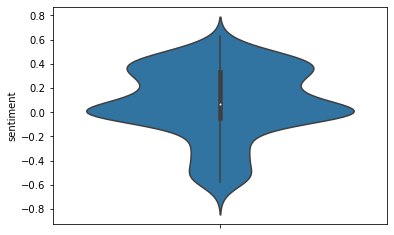

In [63]:
f = sns.violinplot(y=dfps["sentiment"], orient='h')

/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


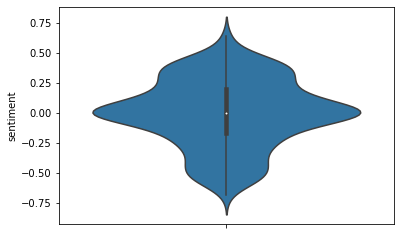

In [64]:
f = sns.violinplot(y=dfxbox["sentiment"], orient='h')

Shapiro-Wilk test indicates that these 2 data are not normally distributed. Then we apply levene test, to determine whether two or more groups have equal variances.

In [65]:
stats.levene(dfps["sentiment"] ,dfxbox["sentiment"], center='median')

LeveneResult(statistic=1.175242112072936, pvalue=0.2785819157246928)

The p-value is not less than .05, thus, we would fail to reject the null hypothesis. We do not have sufficient evidence to say that the variance in these communities comment scores are significantly different.

Since we have 2 not normally distibuted, unpaired data with equal variances, we can apply Mann Whitney U test for hypothesis testing.


In [66]:
stats.mannwhitneyu(x=dfps["sentiment"], y=dfxbox["sentiment"])

MannwhitneyuResult(statistic=109794.5, pvalue=4.800397010063829e-06)

Result of Mann-Whitney U test indicates that, pvalue is lower than the significance level 0.025. Therefore, we have a strong evidence against null hypothesis. It means that PS4 community sentiment scores are significantly higher than sentiment scores of XboxOne community.

This result can be interpreted as PS4 community is more happy or display less negativity towards its community or the product. It was also visible from wordcloud images that are derived from most frequent word usages. Xbox community use more abusive words gave me a hint to test this hypothesis.

Even though this result proved my hypothesis, I know that my data collection method is very sufficient and probably biased. Also, the techniques that I used in preprocessing and sentiment analysis steps were not sufficient to draw strong conclusions about this issue. However, I believe that this work might giva a hint to people who want to investigate behaviors of these 2 rival communities in social media context.